# Day 25 - Image Analysis - Logistic Regression

## Importing Libraries

In [25]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


## Importing Digits data set from SKLearn

In [4]:
from sklearn.datasets import load_digits

digits = load_digits()
type(digits)


sklearn.utils.Bunch

In [8]:
# View Digits data
digits.data.shape

(1797, 64)

**Data Contains 1797 pictures of size 8x8 i.e 64**

## Setting Descriptive and Target features ( data = descriptive , target = target in this data set)

In [9]:
descriptive_features = digits.data
target_feature = digits.target

descriptive_features, target_feature

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

## Retriveing and Plotting first 20 digits

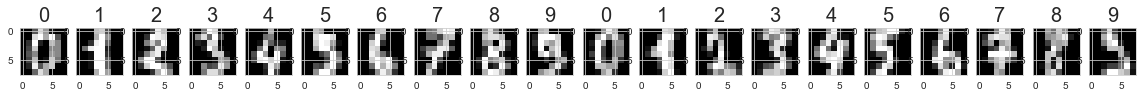

In [21]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(20,4))
# for loop to retrieve first 20 digits
for index , (image,label) in enumerate(zip(digits.data[0:20], digits.target[0:20])):
    plt.subplot(1,20,index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title(label, fontsize =20)#Title Font size



## Splitting data

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(descriptive_features, target_feature, test_size=1/5, random_state=0)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((1437, 64), (360, 64), (1437,), (360,))

## Training Model - Logisitic Regression

In [27]:
# Importing Linear regression from sklearn 
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state=0)
# Fitting Logistic Regression to the  Data
regressor.fit(x_train, y_train)



LogisticRegression(random_state=0)

## Predicting test data

In [32]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 9, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

## Accuracy test

In [39]:
score = regressor.score(x_test,y_test)
print('acuracy of model is :' , score)

acuracy of model is : 0.9666666666666667


## Confusion Matrix


In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

## Creating HEATMAP to understand Confusion matrix

Text(0.5, 1.0, 'Accuracy score : 0.9666666666666667')

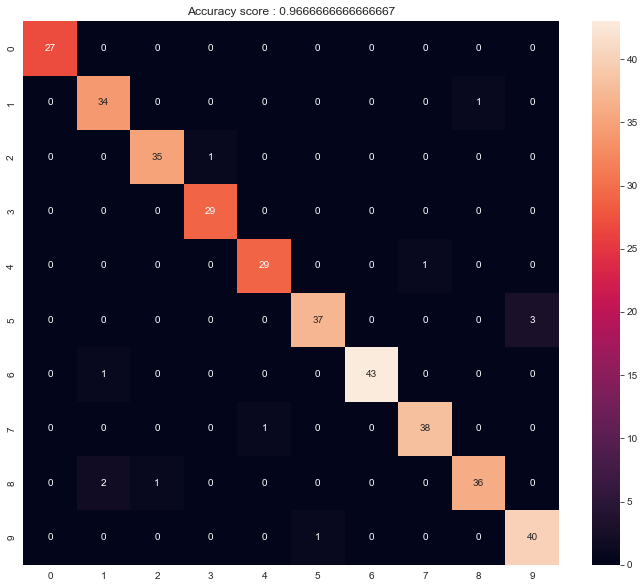

In [40]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot = True,)
plt.ylabel = 'Actual Output'
plt.xlabel = 'Predicted Output'
cm_title = 'Accuracy score : {0}'.format(score)
plt.title(cm_title)

## Getting Misclassified Labels

In [57]:
index = 0
misclassified_indicies = []
for label, predict in zip(y_test,y_pred):
    if label != predict:
        misclassified_indicies.append(index)
        index = index +1
number_of_missclassified_data =len(misclassified_indicies)
print('number of missclassified pictures :',number_of_missclassified_data )

number of missclassified pictures : 12


## Plotting Missclassified Lables with Real Lables

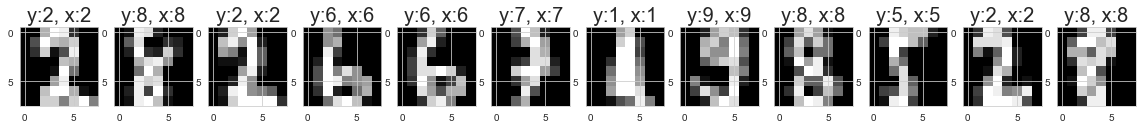

In [56]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(20,4))
for plotindex,badindex in enumerate(misclassified_indicies):
    plt.subplot(1,number_of_missclassified_data, plotindex+1)
    plt.imshow(np.reshape(x_test[badindex],(8,8)), cmap=plt.cm.gray)
    plt.title('y:{}, x:{}'.format(y_pred[badindex],y_test[badindex]), fontsize =20)# predicted =y ; actual =x

    